=== Testing K-means Implementation ===
Dataset shape: (100, 2)
Initialization 1/10
  Iteration 0: SSE = 148.0587
  Converged at iteration 4
Initialization 2/10
  Iteration 0: SSE = 256.0878
  Converged at iteration 5
Initialization 3/10
  Iteration 0: SSE = 180.3319
  Converged at iteration 4
Initialization 4/10
  Iteration 0: SSE = 260.0870
  Converged at iteration 4
Initialization 5/10
  Iteration 0: SSE = 142.4320
  Converged at iteration 5
Initialization 6/10
  Iteration 0: SSE = 272.1084
  Converged at iteration 4
Initialization 7/10
  Iteration 0: SSE = 259.5363
  Converged at iteration 3
Initialization 8/10
  Iteration 0: SSE = 149.5612
  Converged at iteration 3
Initialization 9/10
  Iteration 0: SSE = 144.5116
  Converged at iteration 5
Initialization 10/10
  Iteration 0: SSE = 135.5435
  Converged at iteration 2
Best SSE: 48.6338
Final SSE: 48.6338
Cluster sizes: [25 25 25 25]


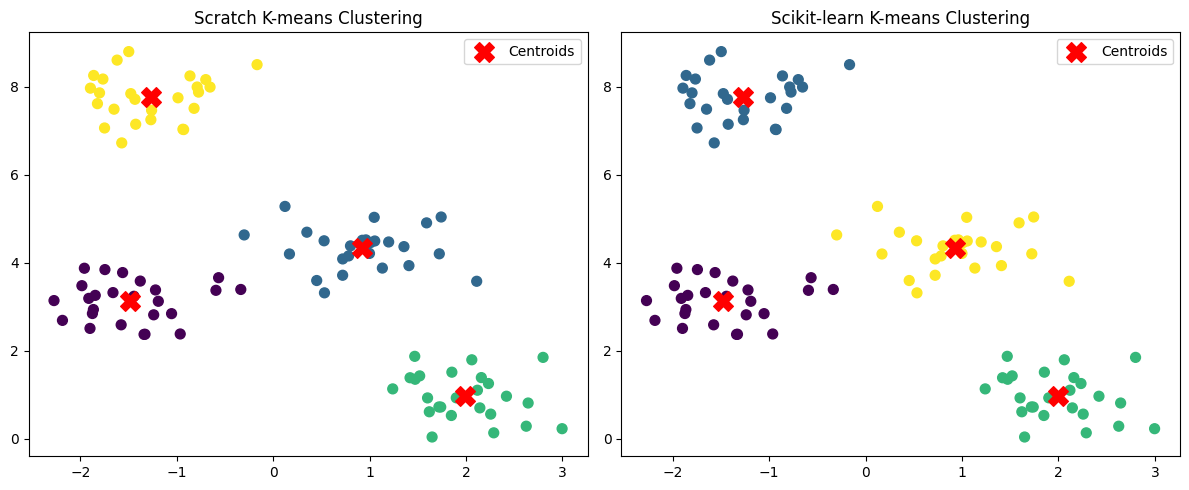


=== Problem 8: Elbow Method ===


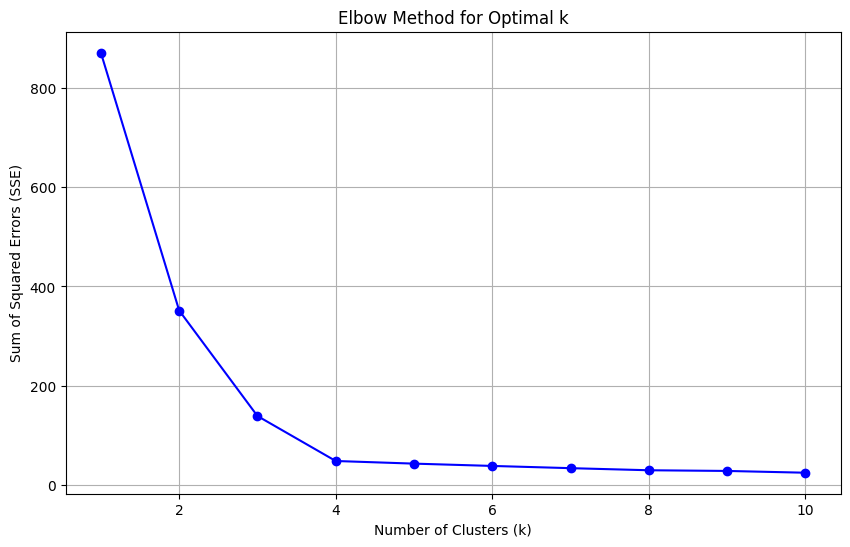


=== Problem 9: Silhouette Analysis ===


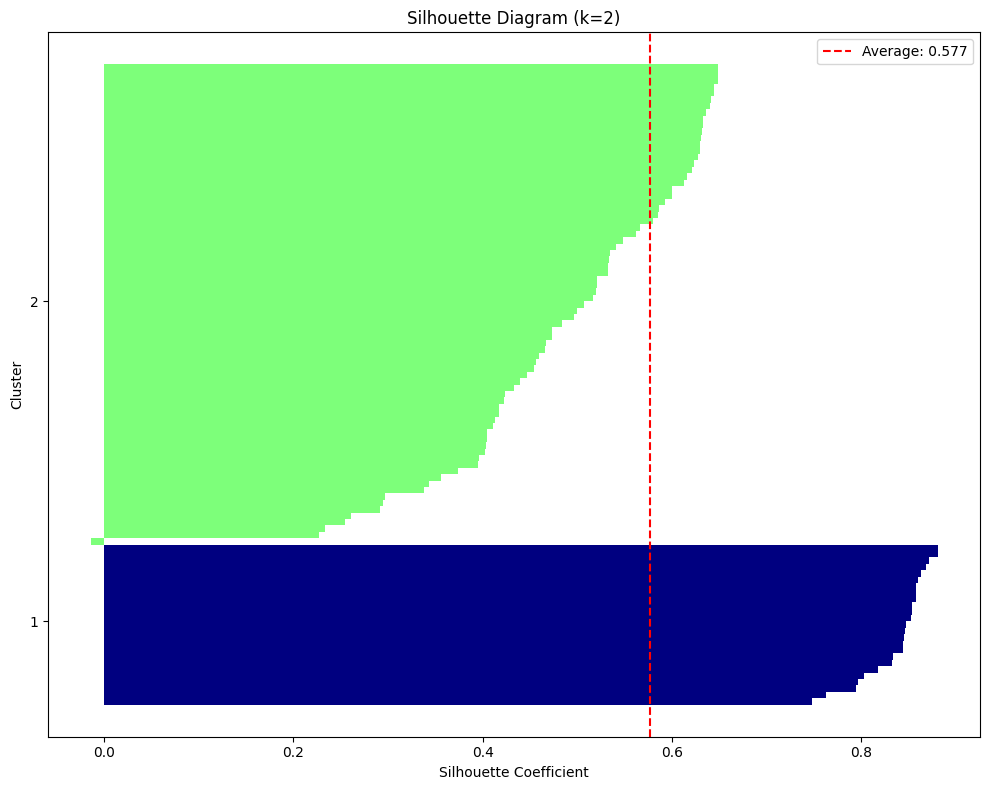

k=2, Average Silhouette Score: 0.577


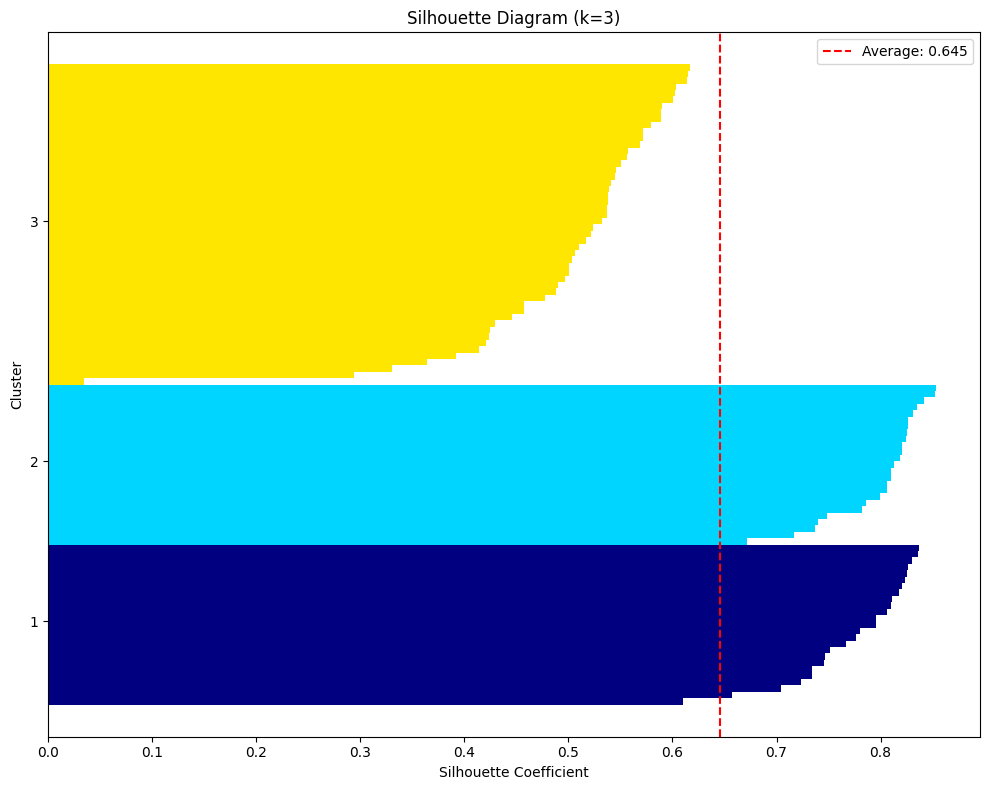

k=3, Average Silhouette Score: 0.645


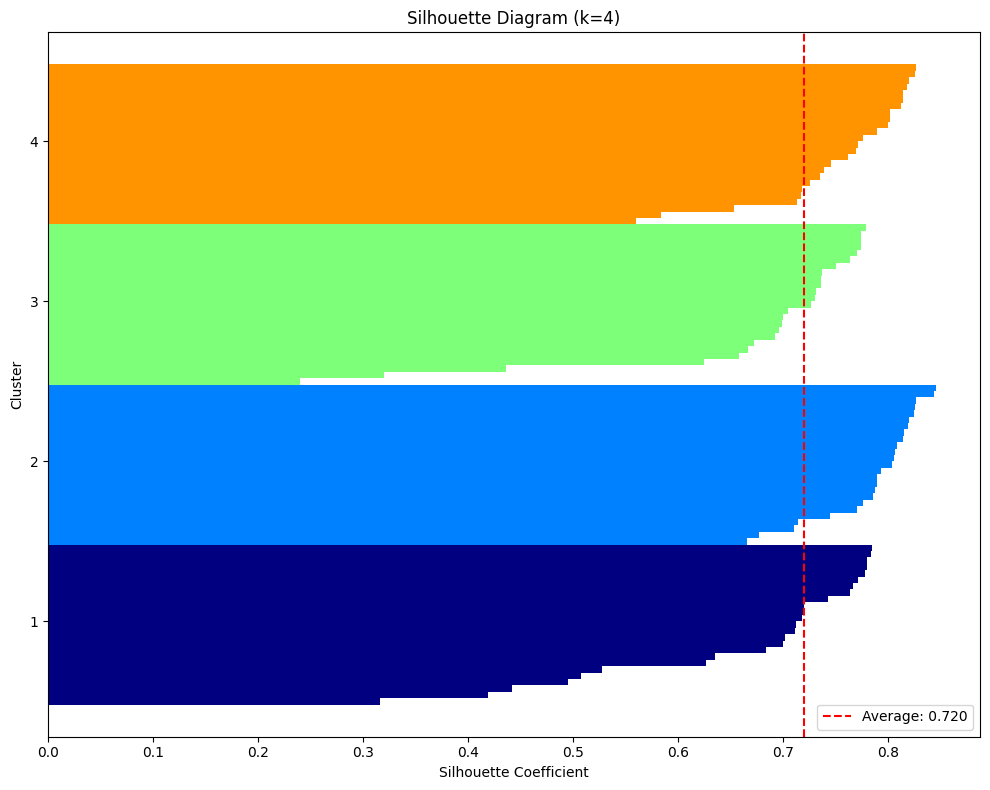

k=4, Average Silhouette Score: 0.720


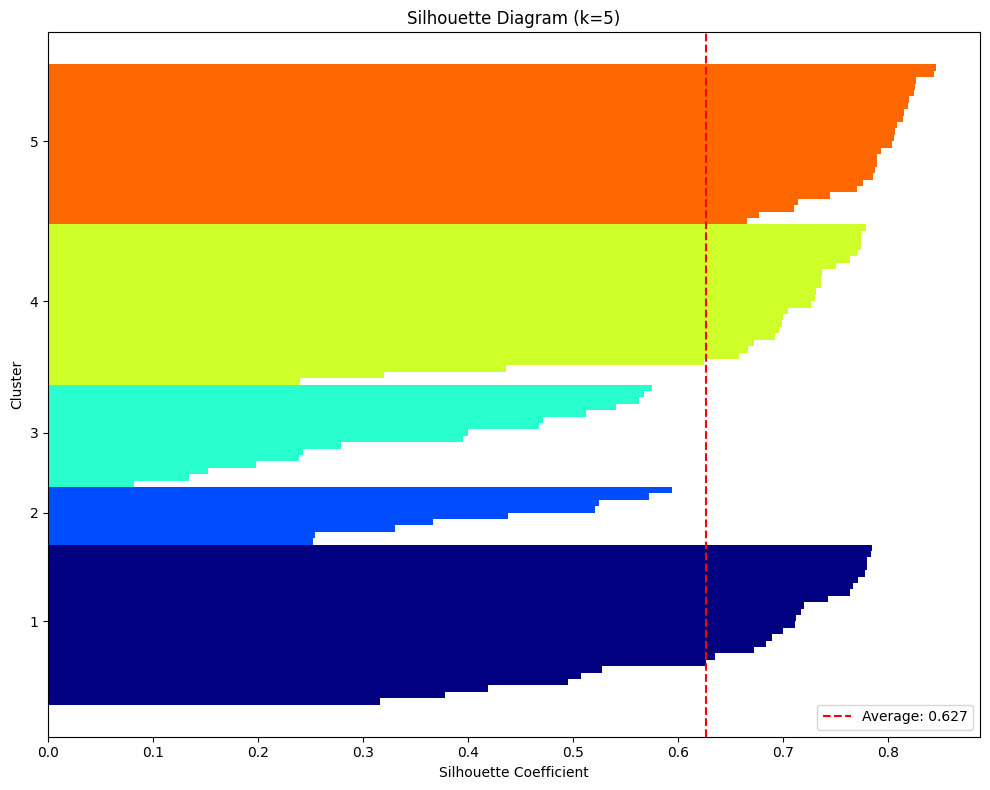

k=5, Average Silhouette Score: 0.627

WHOLESALE CUSTOMERS DATA ANALYSIS
Dataset loaded successfully from URL

Dataset shape: (440, 8)

First few rows:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-

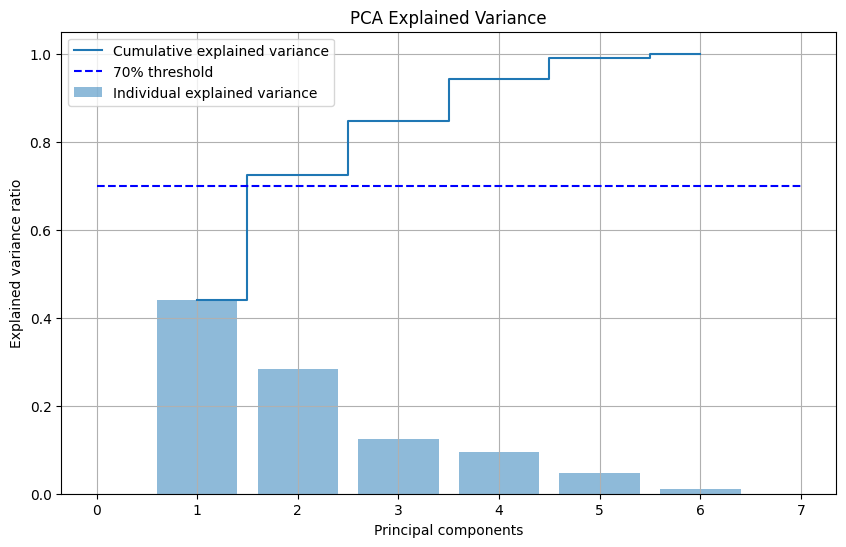


=== Determining Optimal Number of Clusters ===


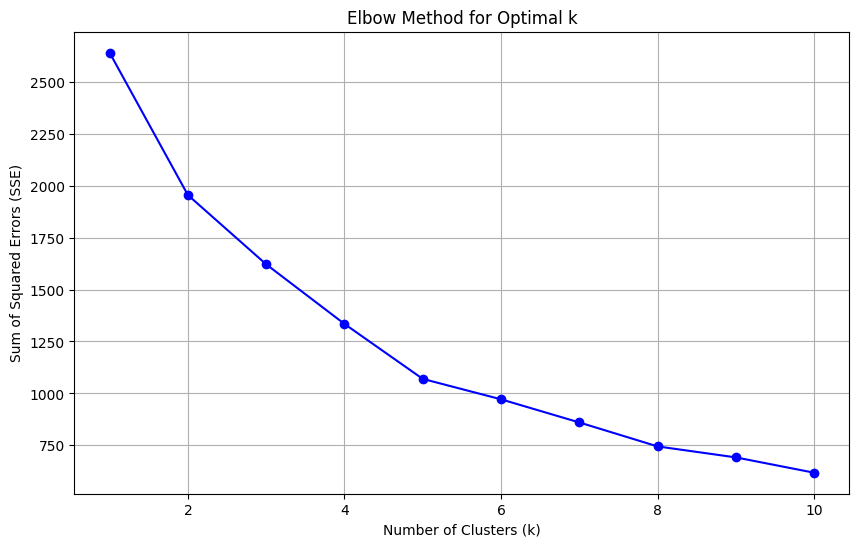

k=2, Silhouette Score: 0.614
k=3, Silhouette Score: 0.340
k=4, Silhouette Score: 0.348
k=5, Silhouette Score: 0.364
k=6, Silhouette Score: 0.302
k=7, Silhouette Score: 0.247

Recommended optimal k: 2
Initialization 1/20
  Iteration 0: SSE = 2345.8073
  Converged at iteration 9
Initialization 2/20
  Iteration 0: SSE = 2140.9815
  Converged at iteration 12
Initialization 3/20
  Iteration 0: SSE = 2323.3165
  Converged at iteration 16
Initialization 4/20
  Iteration 0: SSE = 2025.6747
  Converged at iteration 4
Initialization 5/20
  Iteration 0: SSE = 2266.9757
  Converged at iteration 8
Initialization 6/20
  Iteration 0: SSE = 2337.8533
  Converged at iteration 9
Initialization 7/20
  Iteration 0: SSE = 2045.9993
  Converged at iteration 11
Initialization 8/20
  Iteration 0: SSE = 2161.4697
  Converged at iteration 11
Initialization 9/20
  Iteration 0: SSE = 2274.7628
  Converged at iteration 9
Initialization 10/20
  Iteration 0: SSE = 2016.5460
  Converged at iteration 9
Initialization 

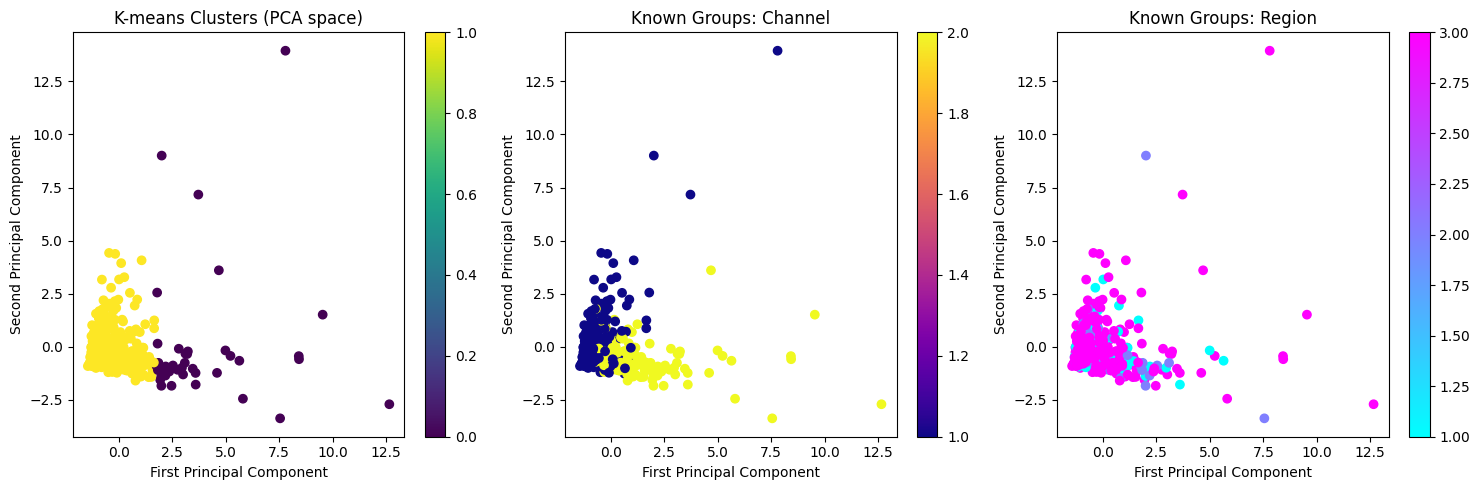


=== Cluster Analysis ===

Average spending per cluster:
                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0        12802.404762  20572.690476  29049.880952  4653.642857   
1        11915.653266   4236.944724   5724.791457  2905.017588   

         Detergents_Paper   Delicassen  
Cluster                                 
0            13424.214286  4046.404762  
1             1768.944724  1258.778894  

Cluster distribution across Channels:
Channel    1    2
Cluster          
0          4   38
1        294  104

Cluster distribution across Regions:
Region    1   2    3
Cluster             
0         7   9   26
1        70  38  290

=== Problem 12: Business Insights ===

Key Insights for Wholesalers:

1. Customer Segmentation:
   - Clusters represent distinct customer types based on purchasing patterns
   - Each cluster has unique product preferences and spending levels

2. Marketing Strategy:
   - Target sp

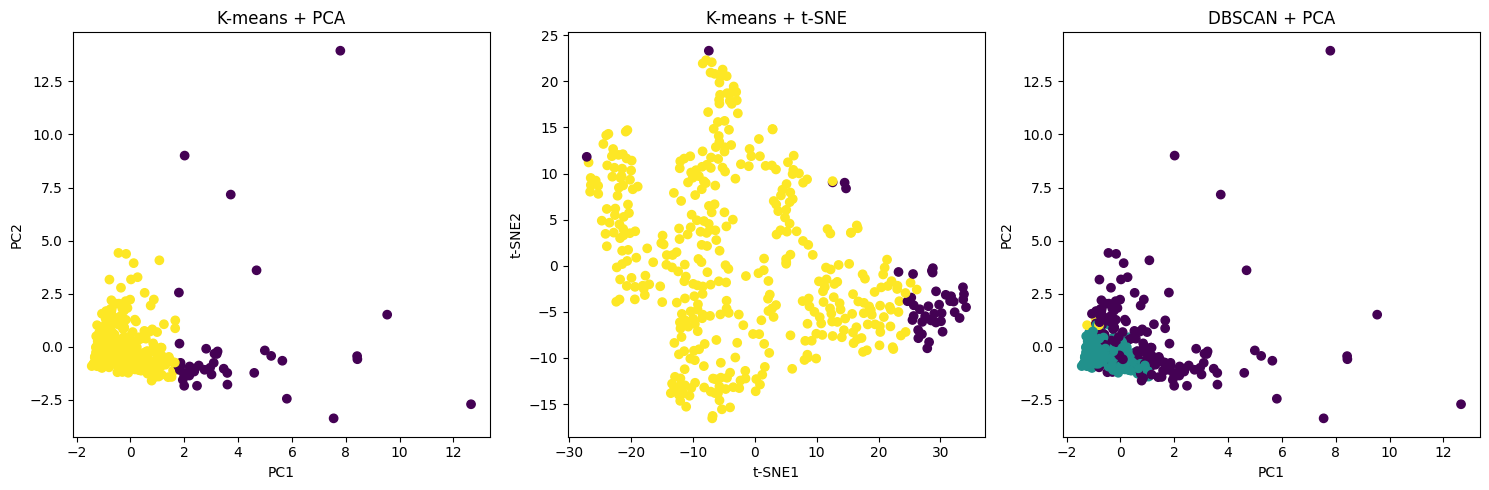

Number of DBSCAN clusters: 3
DBSCAN noise points: 174

=== Method Comparison ===

K-means:
+ Pros: Simple, fast, works well with spherical clusters
+ Cons: Requires specifying k, sensitive to outliers

DBSCAN:
+ Pros: No need to specify k, handles noise, finds arbitrary shapes
+ Cons: Sensitive to parameters, struggles with varying densities

PCA:
+ Pros: Linear, preserves global structure, interpretable components
+ Cons: Linear assumptions, may not capture complex manifolds

t-SNE:
+ Pros: Excellent for visualization, captures local structure
+ Cons: Computational expensive, non-deterministic, less interpretable



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      Number of times to change initial centroids and recalculate
    max_iter : int
      Maximum number of iterations per calculation
    tol : float
      Tolerance for centroid movement to stop iterations
    verbose : bool
      Whether to output learning process
    """

    def __init__(self, n_clusters=3, n_init=10, max_iter=300, tol=1e-4, verbose=False):
        # Hyperparameters
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        # Learned parameters
        self.centroids = None
        self.labels = None
        self.inertia_ = None
        self.best_inertia = float('inf')
        self.best_centroids = None
        self.best_labels = None

    def _initialize_centroids(self, X):
        """
        Problem 1: Determine initial centroids by randomly selecting K data points
        
        Parameters
        ----------
        X : ndarray
            Feature matrix
            
        Returns
        -------
        ndarray
            Initial centroids
        """
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        return X[random_indices]

    def _calculate_sse(self, X, centroids, labels):
        """
        Problem 2: Calculate Sum of Squared Errors (SSE)
        
        Parameters
        ----------
        X : ndarray
            Feature matrix
        centroids : ndarray
            Cluster centroids
        labels : ndarray
            Cluster labels for each data point
            
        Returns
        -------
        float
            SSE value
        """
        sse = 0.0
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                sse += np.sum(np.linalg.norm(cluster_points - centroids[k], axis=1) ** 2)
        return sse

    def _assign_clusters(self, X, centroids):
        """
        Problem 3: Assign data points to nearest centroids
        
        Parameters
        ----------
        X : ndarray
            Feature matrix
        centroids : ndarray
            Cluster centroids
            
        Returns
        -------
        ndarray
            Cluster labels
        """
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)
        
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)
            
        return labels

    def _update_centroids(self, X, labels):
        """
        Problem 4: Move centroids to cluster centers of gravity
        
        Parameters
        ----------
        X : ndarray
            Feature matrix
        labels : ndarray
            Cluster labels
            
        Returns
        -------
        ndarray
            Updated centroids
        """
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
            else:
                # If cluster is empty, reinitialize randomly
                centroids[k] = X[np.random.randint(0, X.shape[0])]
        return centroids

    def _single_fit(self, X):
        """
        Single K-means run with one initialization
        
        Parameters
        ----------
        X : ndarray
            Feature matrix
            
        Returns
        -------
        tuple
            (centroids, labels, inertia, n_iter)
        """
        # Initialize centroids
        centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iter):
            # Assign clusters
            labels = self._assign_clusters(X, centroids)
            
            # Update centroids
            new_centroids = self._update_centroids(X, labels)
            
            # Check convergence
            centroid_shift = np.linalg.norm(new_centroids - centroids, axis=1).max()
            
            centroids = new_centroids
            
            if centroid_shift < self.tol:
                if self.verbose:
                    print(f"  Converged at iteration {iteration}")
                break
                
            if self.verbose and iteration % 50 == 0:
                inertia = self._calculate_sse(X, centroids, labels)
                print(f"  Iteration {iteration}: SSE = {inertia:.4f}")
        
        inertia = self._calculate_sse(X, centroids, labels)
        return centroids, labels, inertia, iteration + 1

    def fit(self, X):
        """
        Problem 5 & 6: K-means clustering with multiple initializations
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        """
        self.best_inertia = float('inf')
        
        for init in range(self.n_init):
            if self.verbose:
                print(f"Initialization {init + 1}/{self.n_init}")
                
            centroids, labels, inertia, n_iter = self._single_fit(X)
            
            if inertia < self.best_inertia:
                self.best_inertia = inertia
                self.best_centroids = centroids.copy()
                self.best_labels = labels.copy()
        
        # Set best results as final
        self.centroids = self.best_centroids
        self.labels = self.best_labels
        self.inertia_ = self.best_inertia
        
        if self.verbose:
            print(f"Best SSE: {self.inertia_:.4f}")

    def predict(self, X):
        """
        Problem 7: Predict cluster labels for new data
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples
            
        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted cluster labels
        """
        return self._assign_clusters(X, self.centroids)

    def fit_predict(self, X):
        """
        Fit and predict in one function
        """
        self.fit(X)
        return self.labels

def plot_elbow_method(X, max_k=10):
    """
    Problem 8: Elbow method for determining optimal k
    
    Parameters
    ----------
    X : ndarray
        Feature matrix
    max_k : int
        Maximum number of clusters to test
    """
    sse_values = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = ScratchKMeans(n_clusters=k, n_init=10, max_iter=300, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_values, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()
    
    return sse_values

def calculate_silhouette(X, labels, n_clusters):
    """
    Problem 9: Calculate silhouette coefficients
    
    Parameters
    ----------
    X : ndarray
        Feature matrix
    labels : ndarray
        Cluster labels
    n_clusters : int
        Number of clusters
        
    Returns
    -------
    tuple
        (silhouette_vals, silhouette_avg)
    """
    n_samples = X.shape[0]
    silhouette_vals = np.zeros(n_samples)
    
    for i in range(n_samples):
        # Current point and its cluster
        current_point = X[i]
        current_cluster = labels[i]
        
        # Calculate a_n (cohesion)
        same_cluster_points = X[labels == current_cluster]
        a_n = np.mean(np.linalg.norm(same_cluster_points - current_point, axis=1))
        
        # Calculate b_n (separation)
        other_cluster_dists = []
        for k in range(n_clusters):
            if k != current_cluster:
                other_cluster_points = X[labels == k]
                if len(other_cluster_points) > 0:
                    dist = np.mean(np.linalg.norm(other_cluster_points - current_point, axis=1))
                    other_cluster_dists.append(dist)
        
        b_n = np.min(other_cluster_dists) if other_cluster_dists else 0
        
        # Calculate silhouette coefficient
        silhouette_vals[i] = (b_n - a_n) / max(a_n, b_n) if max(a_n, b_n) > 0 else 0
    
    silhouette_avg = np.mean(silhouette_vals)
    return silhouette_vals, silhouette_avg

def plot_silhouette_diagram(X, y_km, n_clusters):
    """
    Problem 9: Plot silhouette diagram
    """
    silhouette_vals, silhouette_avg = calculate_silhouette(X, y_km, n_clusters)
    cluster_labels = np.unique(y_km)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        ax.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, 
                height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    ax.axvline(silhouette_avg, color="red", linestyle="--", label=f'Average: {silhouette_avg:.3f}')
    ax.set_yticks(yticks)
    ax.set_yticklabels(cluster_labels + 1)
    ax.set_ylabel('Cluster')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_title(f'Silhouette Diagram (k={n_clusters})')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    return silhouette_avg

# Testing with artificial dataset
print("=== Testing K-means Implementation ===")

# Create artificial dataset
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

print(f"Dataset shape: {X.shape}")

# Test our K-means implementation
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=1e-4, verbose=True)
kmeans.fit(X)
labels = kmeans.labels

print(f"Final SSE: {kmeans.inertia_:.4f}")
print(f"Cluster sizes: {np.bincount(labels)}")

# Visualize results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
           c='red', marker='X', s=200, label='Centroids')
plt.title('Scratch K-means Clustering')
plt.legend()

plt.subplot(1, 2, 2)
# Compare with scikit-learn
from sklearn.cluster import KMeans
sklearn_kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
sklearn_labels = sklearn_kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='viridis', s=50)
plt.scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1],
           c='red', marker='X', s=200, label='Centroids')
plt.title('Scikit-learn K-means Clustering')
plt.legend()

plt.tight_layout()
plt.show()

# Problem 8: Elbow method
print("\n=== Problem 8: Elbow Method ===")
sse_values = plot_elbow_method(X, max_k=10)

# Problem 9: Silhouette analysis
print("\n=== Problem 9: Silhouette Analysis ===")
for k in [2, 3, 4, 5]:
    kmeans_test = ScratchKMeans(n_clusters=k, n_init=10, verbose=False)
    labels_test = kmeans_test.fit_predict(X)
    avg_silhouette = plot_silhouette_diagram(X, labels_test, k)
    print(f"k={k}, Average Silhouette Score: {avg_silhouette:.3f}")

# Load and analyze Wholesale customers dataset
print("\n" + "="*50)
print("WHOLESALE CUSTOMERS DATA ANALYSIS")
print("="*50)

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully from URL")
except:
    # Fallback to local file
    try:
        df = pd.read_csv("Wholesale customers data.csv")
        print("Dataset loaded from local file")
    except:
        print("Could not load dataset. Using sample data for demonstration.")
        # Create sample data for demonstration
        np.random.seed(42)
        df = pd.DataFrame({
            'Channel': np.random.choice([1, 2], 100),
            'Region': np.random.choice([1, 2, 3], 100),
            'Fresh': np.random.normal(10000, 5000, 100),
            'Milk': np.random.normal(5000, 2000, 100),
            'Grocery': np.random.normal(8000, 3000, 100),
            'Frozen': np.random.normal(2000, 1000, 100),
            'Detergents_Paper': np.random.normal(1000, 500, 100),
            'Delicassen': np.random.normal(500, 200, 100)
        })

print(f"\nDataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

# Prepare data for clustering (exclude Channel and Region for unsupervised learning)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X_wholesale = df[features].values

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wholesale)

# Problem 10: PCA for dimensionality reduction and visualization
print("\n=== Problem 10: PCA Dimensionality Reduction ===")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_):.3f}")

# Plot explained variance
pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)
var_exp = pca_full.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), var_exp, alpha=0.5, align='center', 
        label='Individual explained variance')
plt.step(range(1, 7), cum_var_exp, where='mid', 
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 7, "blue", linestyles='dashed', label='70% threshold')
plt.legend(loc='best')
plt.grid()
plt.title('PCA Explained Variance')
plt.show()

# Determine optimal k using elbow method and silhouette analysis
print("\n=== Determining Optimal Number of Clusters ===")

# Elbow method
sse_wholesale = plot_elbow_method(X_scaled, max_k=10)

# Silhouette analysis for different k values
silhouette_scores = []
for k in range(2, 8):
    kmeans_temp = ScratchKMeans(n_clusters=k, n_init=10, verbose=False)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels_temp)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}, Silhouette Score: {silhouette_avg:.3f}")

optimal_k = np.argmax(silhouette_scores) + 2
print(f"\nRecommended optimal k: {optimal_k}")

# Fit final model with optimal k
final_kmeans = ScratchKMeans(n_clusters=optimal_k, n_init=20, verbose=True)
final_labels = final_kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = final_labels

# Problem 11: Compare with known groups
print("\n=== Problem 11: Comparison with Known Groups ===")

# Visualize clusters in PCA space
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clusters (PCA space)')
plt.colorbar(scatter)

plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Channel'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Known Groups: Channel')
plt.colorbar(scatter)

plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Region'], cmap='cool')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Known Groups: Region')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Analyze cluster characteristics
print("\n=== Cluster Analysis ===")
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nAverage spending per cluster:")
print(cluster_summary)

# Compare with known groups
print("\nCluster distribution across Channels:")
print(pd.crosstab(df['Cluster'], df['Channel']))

print("\nCluster distribution across Regions:")
print(pd.crosstab(df['Cluster'], df['Region']))

# Problem 12: Useful insights for wholesalers
print("\n=== Problem 12: Business Insights ===")
print("""
Key Insights for Wholesalers:

1. Customer Segmentation:
   - Clusters represent distinct customer types based on purchasing patterns
   - Each cluster has unique product preferences and spending levels

2. Marketing Strategy:
   - Target specific product promotions based on cluster characteristics
   - High Grocery/Milk clusters might respond to bundled offers
   - Fresh/Frozen focused clusters need different marketing approaches

3. Inventory Management:
   - Adjust stock levels based on cluster distribution in different regions
   - Optimize supply chain for predominant product categories per cluster

4. Customer Retention:
   - Identify high-value clusters for premium services
   - Develop retention strategies for each customer segment
""")

# Advanced: Other clustering methods
print("\n" + "="*50)
print("ADVANCED CLUSTERING METHODS")
print("="*50)

# Problem 13 & 14: t-SNE and DBSCAN
print("\n=== Problem 13 & 14: t-SNE and DBSCAN ===")

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Compare clustering results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis')
plt.title('K-means + PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=final_labels, cmap='viridis')
plt.title('K-means + t-SNE')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN + PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

print(f"Number of DBSCAN clusters: {len(np.unique(dbscan_labels))}")
print(f"DBSCAN noise points: {np.sum(dbscan_labels == -1)}")

# Comparison of methods
print("\n=== Method Comparison ===")
print("""
K-means:
+ Pros: Simple, fast, works well with spherical clusters
+ Cons: Requires specifying k, sensitive to outliers

DBSCAN:
+ Pros: No need to specify k, handles noise, finds arbitrary shapes
+ Cons: Sensitive to parameters, struggles with varying densities

PCA:
+ Pros: Linear, preserves global structure, interpretable components
+ Cons: Linear assumptions, may not capture complex manifolds

t-SNE:
+ Pros: Excellent for visualization, captures local structure
+ Cons: Computational expensive, non-deterministic, less interpretable
""")
